In [1]:
import os
import cv2
import math
import pafy
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Set Seed

In [2]:
np.random.seed(17)
random.seed(17)

## Visualise Data

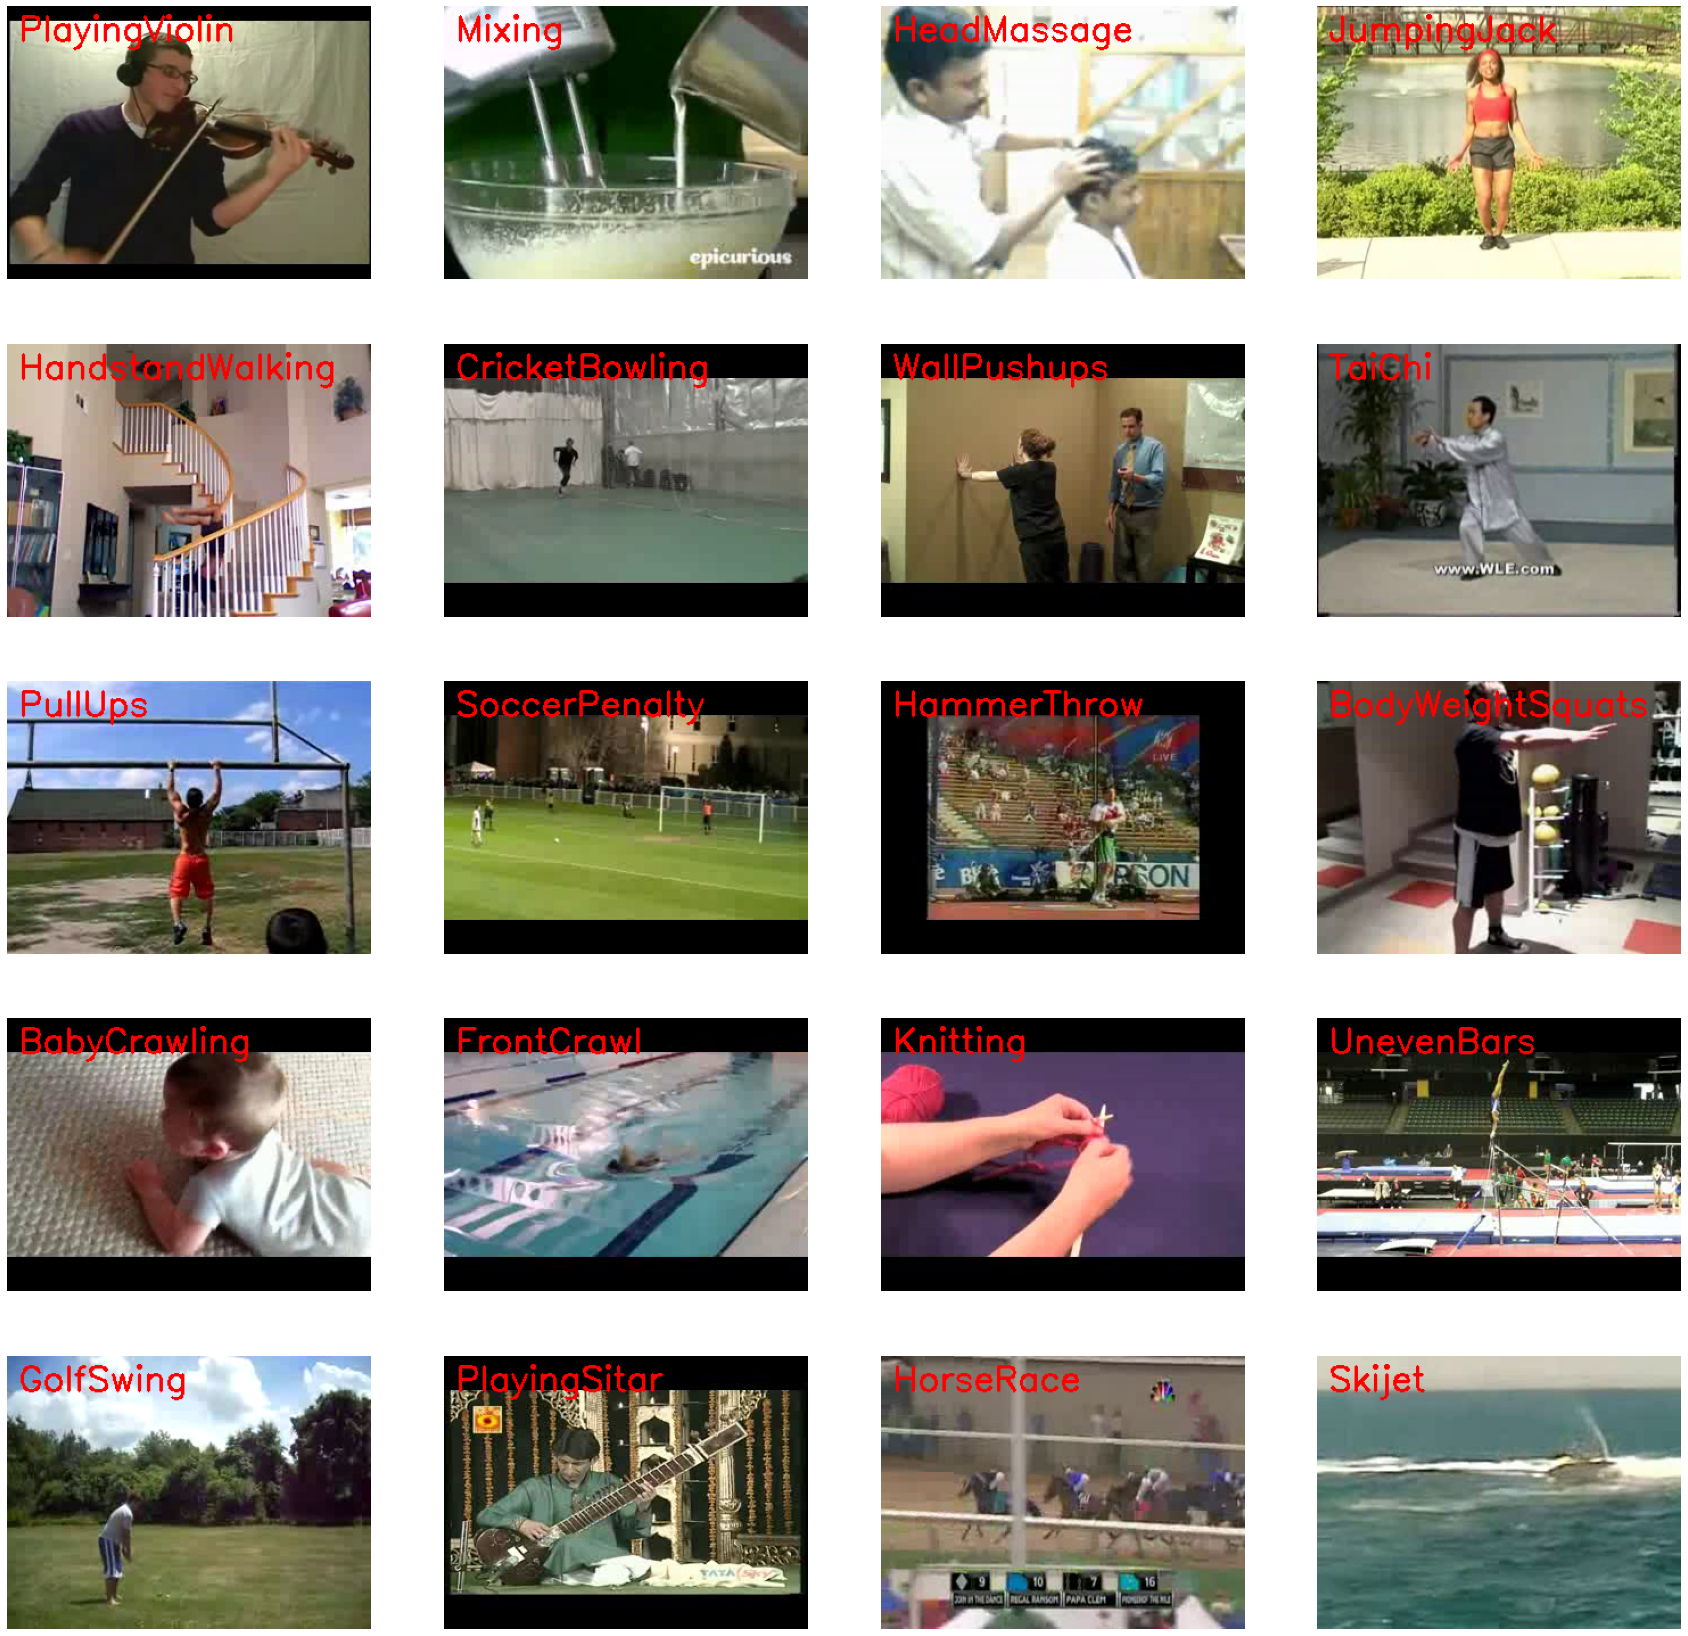

In [3]:
# Create a Matplotlib figure
plt.figure(figsize = (30, 30))

# Get Names of all classes in UCF101
all_classes_names = os.listdir('UCF101')

# Generate a random sample of images each time the cell runs
random_range = random.sample(range(len(all_classes_names)), 20)

# Iterating through all the random samples
for counter, random_index in enumerate(random_range, 1):

    # Getting Class Name using Random Index
    selected_class_Name = all_classes_names[random_index]

    # Getting a list of all the video files present in a Class Directory
    video_files_names_list = os.listdir(f'UCF101/{selected_class_Name}')

    # Randomly selecting a video file
    selected_video_file_name = random.choice(video_files_names_list)

    # Reading the Video File Using the Video Capture
    video_reader = cv2.VideoCapture(f'UCF101/{selected_class_Name}/{selected_video_file_name}')
    
    # Reading The First Frame of the Video File
    _, bgr_frame = video_reader.read()

    # Closing the VideoCapture object and releasing all resources. 
    video_reader.release()

    # Converting the BGR Frame to RGB Frame 
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Adding The Class Name Text on top of the Video Frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    
    # Assigning the Frame to a specific position of a subplot
    plt.subplot(5, 4, counter)
    plt.imshow(rgb_frame)
    plt.axis('off')

## PreProcessing

In [4]:
image_height, image_width = 64, 64
max_images_per_video = 5

dataset_directory = "UCF101"
classes_list = os.listdir('UCF101')

model_output_size = len(classes_list)


### Extract frames and resize them

In [5]:
def frames_extraction(video_path):
    # Empty List declared to store video frames
    frames_list = []
    frames5 = []
    
    # Reading the Video File Using the VideoCapture
    video_reader = cv2.VideoCapture(video_path)

    # Iterating through Video Frames
    while True:

        # Reading a frame from the video file 
        success, frame = video_reader.read() 

        # If Video frame was not successfully read then break the loop
        if not success:
            break

        # Resize the Frame to fixed Dimensions
        resized_frame = cv2.resize(frame, (image_height, image_width))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
        
        # Appending the normalized frame into the frames list
        frames_list.append(normalized_frame)
        
    
    # Closing the VideoCapture object and releasing all resources. 
    video_reader.release()
    
    # Adding randomly selected frames to the frames list
    frames5.extend(random.sample(frames_list, max_images_per_video))

    # returning the frames list 
    return frames5

### Create Database

In [6]:
def create_dataset():

    # Declaring Empty Lists to store the features and labels values.
    features = []
    labels = []
    
    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(classes_list):
        print(f'Extracting Data of Class: {class_name}')
        
        # Getting the list of video files present in the specific class name directory
        files_list = os.listdir(os.path.join(dataset_directory, class_name))

        # Iterating through all the files present in the files list
        for file_name in files_list:

            # Construct the complete video path
            video_file_path = os.path.join(dataset_directory, class_name, file_name)

            # Calling the frame_extraction method for every video file path
            frames = frames_extraction(video_file_path)

            # Appending the frames to a temporary list.
            features.extend(frames)
        
        # Adding Fixed number of labels to the labels list
        labels.extend([class_index] * (max_images_per_video * len(files_list)))
        
    # Converting the features and labels lists to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)  

    return features, labels

In [7]:
features, labels = create_dataset()

Extracting Data of Class: ApplyEyeMakeup
Extracting Data of Class: ApplyLipstick
Extracting Data of Class: Archery
Extracting Data of Class: BabyCrawling
Extracting Data of Class: BalanceBeam
Extracting Data of Class: BandMarching
Extracting Data of Class: BaseballPitch
Extracting Data of Class: Basketball
Extracting Data of Class: BasketballDunk
Extracting Data of Class: BenchPress
Extracting Data of Class: Biking
Extracting Data of Class: Billiards
Extracting Data of Class: BlowDryHair
Extracting Data of Class: BlowingCandles
Extracting Data of Class: BodyWeightSquats
Extracting Data of Class: Bowling
Extracting Data of Class: BoxingPunchingBag
Extracting Data of Class: BoxingSpeedBag
Extracting Data of Class: BreastStroke
Extracting Data of Class: BrushingTeeth
Extracting Data of Class: CleanAndJerk
Extracting Data of Class: CliffDiving
Extracting Data of Class: CricketBowling
Extracting Data of Class: CricketShot
Extracting Data of Class: CuttingInKitchen
Extracting Data of Class: 

In [8]:
np.save('features.npy',features)

In [9]:
np.save('labels.npy',labels)